In [44]:
import torch
import torch.nn as nn
import torchvision.datasets
import numpy as np
import matplotlib.pyplot as plt
from Generative_model import *

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)

# MNIST Interpolation

## Importing MNIST data

In [45]:
# Set parameters
batch_size_train = 64
batch_size_test = 1000
epochs = 100
lr = 1e-3

In [46]:
# Defining the transformation (convert to tensor and normalize)
transform = torchvision.transforms.Compose([
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.1307,), (0.3081,))])
# Load Training data
trainloader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/',
                                                                     train=True, 
                                                                     download=True, 
                                                                     transform=transform), 
                                                                     batch_size=batch_size_train, shuffle=True)
# Load Testing data
testloader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', 
                                                                    train=False, download=True, 
                                                                    transform=transform), 
                                                                    batch_size=batch_size_test, shuffle=True)

## Data Exploration

In [47]:
# Overview of data dimensions (how to access it)
dims_training = trainloader.dataset.data.shape
dims_testing = testloader.dataset.data.shape

print(f'There are {dims_training[0]} samples with a dimension of {dims_training[1]}x{dims_training[2]} (Training Set).')
print(f'There are {dims_testing[0]} samples with a dimension of {dims_testing[1]}x{dims_testing[2]} (Testing Set).')

There are 60000 samples with a dimension of 28x28 (Training Set).
There are 10000 samples with a dimension of 28x28 (Testing Set).


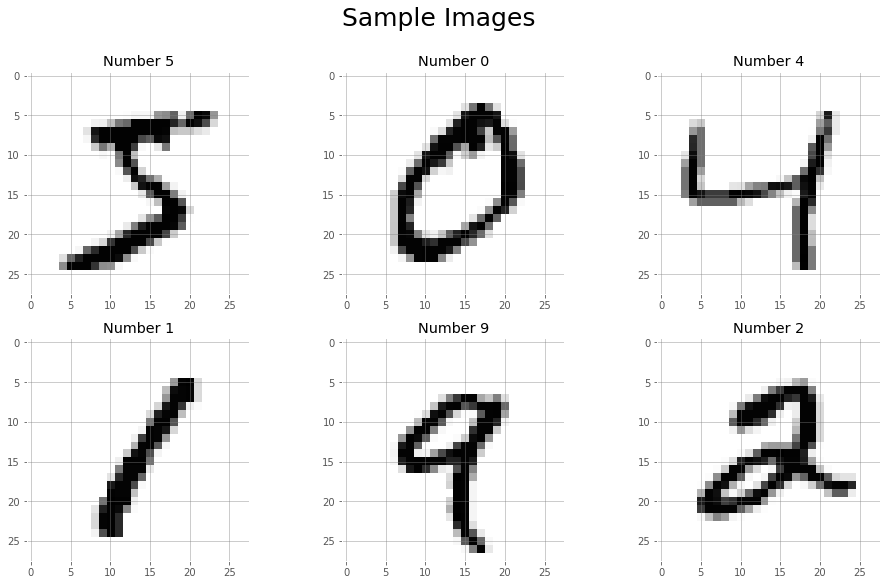

In [48]:
# Creating subplot
fig, axs = plt.subplots(2, 3)
plt.suptitle('Sample Images', fontsize=25)
axs = axs.ravel() # unravel so it is easier in for loop

# Plotting first 6 images
for i in range(6):
    
    # Access image and label
    image = trainloader.dataset.data[i]
    label = trainloader.dataset.targets[i]
    
    # Plot
    axs[i].imshow(image, cmap='Greys')
    axs[i].grid(True, color='grey', alpha=0.5)
    axs[i].set_title(f'Number {label}')

## Model

In [49]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net = Net(input_shape=28*28).to(device)

optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=1e-5)
criterion = nn.MSELoss()

In [50]:
total_loss = []
for i, epoch in enumerate(np.arange(epochs)):

    # Running Loss
    loss = 0
    for j, batch_images in enumerate(trainloader):

        batch_images, _ = batch_images

        # Reshape images to be [N, 784] matrix (N = batch size)
        inputs = batch_images.view(-1, 28*28).to(device)

        # Zero Gradients for each batch
        optimizer.zero_grad()

        # Pass through autoencoder
        reconstructed = net(inputs)

        # Compute Loss, backprop, and update weights
        loss_val = criterion(reconstructed, inputs)
        loss_val.backward()
        optimizer.step()

        # Add batch loss
        loss += loss_val.item()

    # Compute epoch loss
    total_loss.append(loss / len(trainloader))
    print(f'Epoch: {epoch + 1} | Loss: {total_loss[i]:0.3f} (MSE)')

Epoch: 1 | Loss: 0.351 (MSE)
Epoch: 2 | Loss: 0.288 (MSE)
Epoch: 3 | Loss: 0.278 (MSE)
Epoch: 4 | Loss: 0.272 (MSE)
Epoch: 5 | Loss: 0.271 (MSE)
Epoch: 6 | Loss: 0.270 (MSE)
Epoch: 7 | Loss: 0.270 (MSE)
Epoch: 8 | Loss: 0.269 (MSE)


KeyboardInterrupt: 

In [28]:
image = image.view(image.size(0), -1)
reconstucted_image = net(image.flatten().float())
reconstucted_image = reconstucted_image.detach().cpu().numpy().reshape(28, 28)

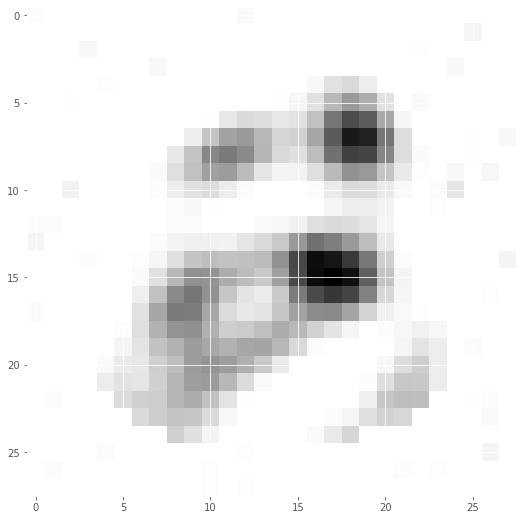

In [29]:
plt.imshow(reconstucted_image, cmap='Greys')